
📝 Project: Classification on Loan Prediction Dataset

In this project, we work with a real-world dataset related to loan applications. The dataset includes various applicant details such as education level, employment status, income, loan amount, credit history, property area, and whether or not the loan was approved. Our objective is to build an end-to-end machine learning pipeline—from data exploration and preprocessing to model training and evaluation—to classify whether a loan application is likely to be approved or rejected.

🎯 Objective:

The primary goal is to build and compare the performance of multiple machine learning models to accurately predict the loan approval status (Loan_Status). This classification is crucial for financial institutions to assess applicant risk, streamline the loan approval process, and make informed lending decisions.

The models evaluated include:

Logistic Regression

Naive Bayes

Decision Tree

Random Forest

AdaBoost

XGBoost

📊 Evaluation Metrics:

To evaluate the performance of each model, we use the following metrics:

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

✅ Outcome:

By comparing these metrics across all models, we aim to identify the best-performing algorithm for loan status classification. The insights derived from this project can help banks and financial services improve credit risk assessment, reduce default rates, and enhance decision-making strategies in loan processing.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [3]:
data=pd.read_csv("C:/Users/SUSHMITHA/Downloads/sudents and projects (1)/sudents and projects/S2/Classification/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

Loan_ID               0
Gender                0
Married              13
Dependents            3
Education            15
Self_Employed         0
ApplicantIncome      32
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     22
Credit_History       14
Property_Area        50
Loan_Status           0
Dependent             0
dtype: int64

In [8]:
#dealing with missing values mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed','Loan_Amount_Term','Credit_History']:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\SUSHMITHA\AppData\Local\Temp\ipykernel_12628\4063909117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

C:\Users\SUSHMITHA\AppData\Local\Temp\ipykernel_12628\4230643855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          599 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    582 non-null    object 
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      564 non-null    float64
 12  Loan_Status        614 non-null    object 
 13  Dependent          614 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [11]:
# Handle missing values
data.fillna(method='ffill', inplace=True)

C:\Users\SUSHMITHA\AppData\Local\Temp\ipykernel_12628\605117171.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


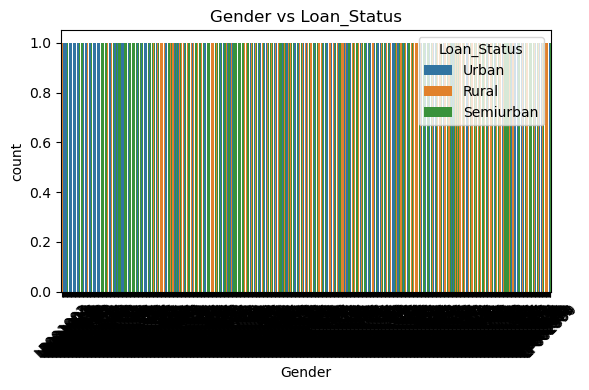

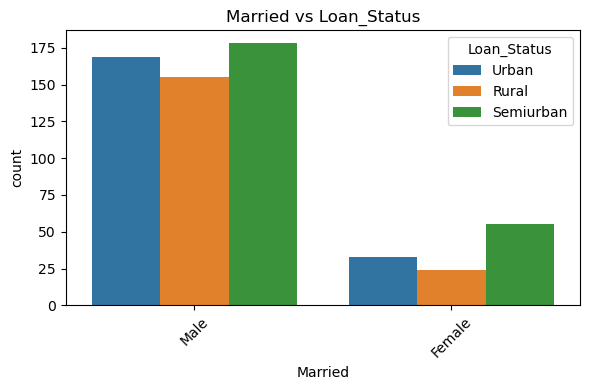

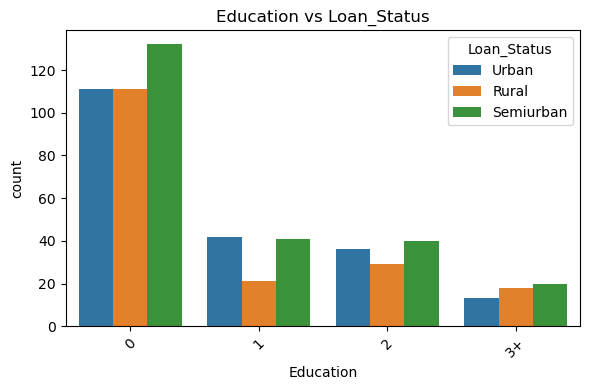

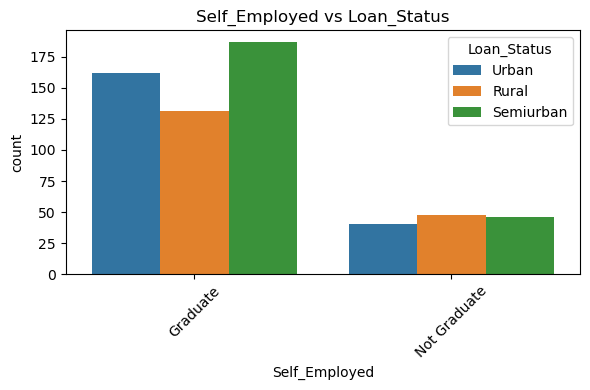

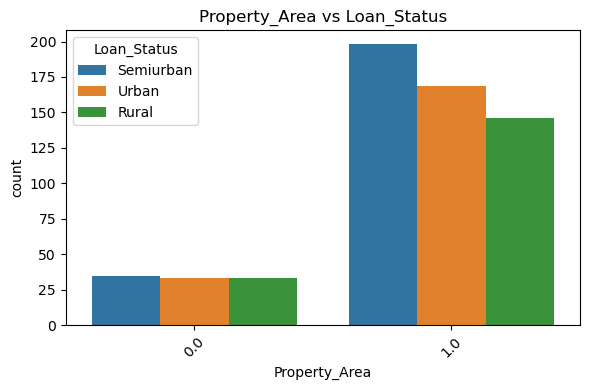

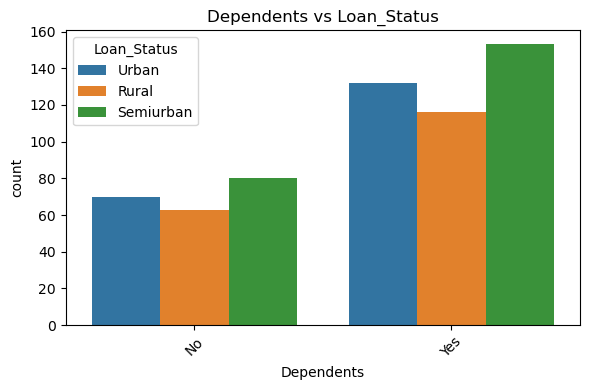

In [12]:
# Categorical Variable Counts
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, hue='Loan_Status')
    plt.title(f"{col} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

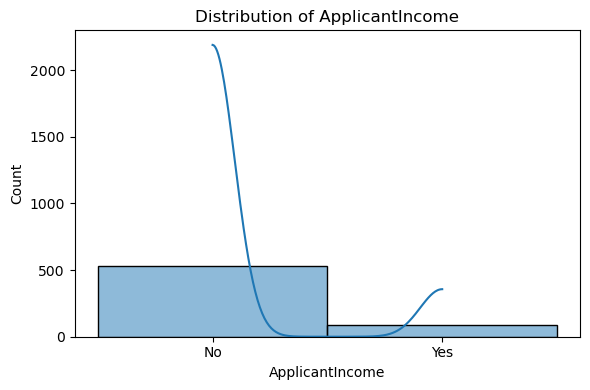

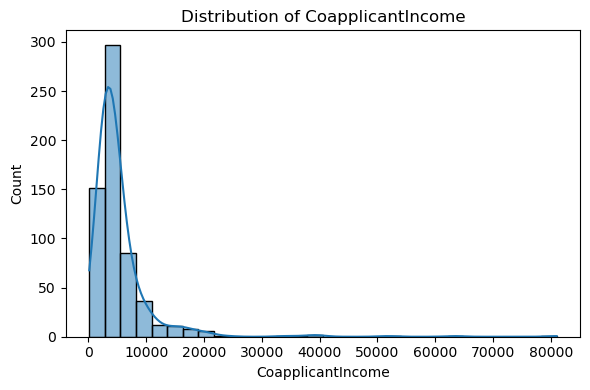

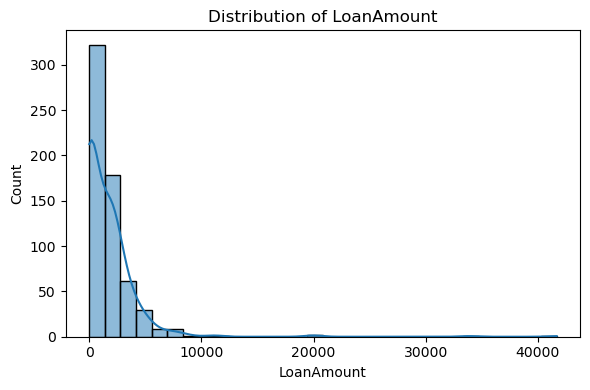

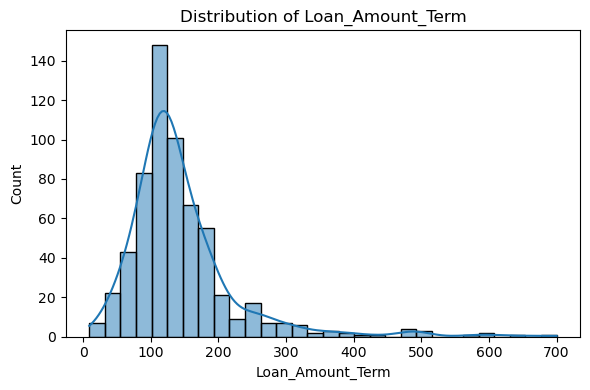

In [13]:
# Numerical Variable Distribution
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

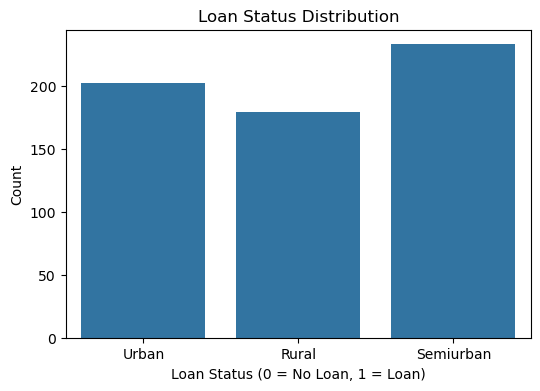

In [14]:
# plot claim status distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = No Loan, 1 = Loan)')
plt.ylabel('Count')
plt.show()

In [15]:
# Encode categorical features
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [16]:
# Features & Target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']  # Assuming 'Loan_Status' is the target column

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_accuracy = 0
best_model = None

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f"\n✅ Best Performing Model: {best_model} with accuracy {best_accuracy:.4f}")


Logistic Regression Accuracy: 0.3984
Random Forest Accuracy: 0.4146
SVM Accuracy: 0.3659


C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:59:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.4146

✅ Best Performing Model: Random Forest with accuracy 0.4146


In [20]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply label encoding to all relevant categorical columns
for col in ['Loan_ID','Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']:
    data[col] = le.fit_transform(data[col])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select numerical columns for scaling
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Apply scaling
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [22]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
0,0,0,1,0,0,0,-0.403582,0.072991,-0.554487,-0.302759,360.0,1,2,1
1,1,1,1,1,1,0,-0.403582,-0.134412,-0.038732,-0.207648,360.0,1,0,0
2,2,2,1,1,0,0,2.477808,-0.393747,-0.554487,-0.944757,360.0,1,2,1
3,3,3,1,1,0,1,-0.403582,-0.462062,0.251980,-0.302759,360.0,1,2,1
4,4,4,1,0,0,0,-0.403582,0.097728,-0.554487,-0.053093,360.0,1,2,1


In [23]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependent
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000,614.000000
mean,306.500000,306.500000,0.817590,0.653094,0.760586,0.218241,-7.811341e-17,-4.339634e-18,4.050325e-17,-5.786179e-17,342.410423,0.835505,1.037459,0.687296
std,177.390811,177.390811,0.386497,0.476373,1.012005,0.413389,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,64.428629,0.371027,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.035824e-01,-8.606493e-01,-5.544873e-01,-1.622422e+00,12.000000,0.000000,0.000000,0.000000
25%,153.250000,153.250000,1.000000,0.000000,0.000000,0.000000,-4.035824e-01,-4.138159e-01,-5.544873e-01,-5.375641e-01,360.000000,1.000000,0.000000,0.000000
50%,306.500000,306.500000,1.000000,1.000000,0.000000,0.000000,-4.035824e-01,-2.606393e-01,-1.480047e-01,-2.433149e-01,360.000000,1.000000,1.000000,1.000000
75%,459.750000,459.750000,1.000000,1.000000,2.000000,0.000000,-4.035824e-01,6.414426e-02,2.312023e-01,2.292671e-01,360.000000,1.000000,2.000000,1.000000
max,613.000000,613.000000,1.000000,1.000000,3.000000,1.000000,2.477808e+00,1.238462e+01,1.369617e+01,6.592777e+00,480.000000,1.000000,2.000000,1.000000


In [24]:
X = data.drop('Loan_Status', axis=1) # Features
X = data.drop('Loan_ID', axis=1)
y = data['Loan_Status']                # Target

In [25]:
print(y.value_counts())

Loan_Status
1    233
2    202
0    179
Name: count, dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)  
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)  
  
print('After SMOTE class distribution:')  
print(y_train_bal.value_counts())

After SMOTE class distribution:
Loan_Status
1    191
0    191
2    191
Name: count, dtype: int64


<h1>Logistic Regrssion</h1>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.991869918699187
[[38  0  0]
 [ 0 41  1]
 [ 0  0 43]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      0.98      0.99        42
           2       0.98      1.00      0.99        43

    accuracy                           0.99       123
   macro avg       0.99      0.99      0.99       123
weighted avg       0.99      0.99      0.99       123



C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h1>KNN</h1>

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.43902439024390244
[[19 14  5]
 [ 8 17 17]
 [10 15 18]]
              precision    recall  f1-score   support

           0       0.51      0.50      0.51        38
           1       0.37      0.40      0.39        42
           2       0.45      0.42      0.43        43

    accuracy                           0.44       123
   macro avg       0.44      0.44      0.44       123
weighted avg       0.44      0.44      0.44       123



<h1>Navie Bayes</h1>

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()
nb.fit(X_train_bal, y_train_bal)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



<h1>SVM</h1>

In [35]:
#kernel=rbf
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', random_state=42)  # 'rbf' is good for non-linear problems
svm_rbf.fit(X_train_bal, y_train_bal)

y_pred_svm = svm_rbf.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.36585365853658536
Confusion Matrix:
 [[23  5 10]
 [22  3 17]
 [22  2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.61      0.44        38
           1       0.30      0.07      0.12        42
           2       0.41      0.44      0.43        43

    accuracy                           0.37       123
   macro avg       0.35      0.37      0.33       123
weighted avg       0.35      0.37      0.32       123



In [36]:
#kernel=linear
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')  
svm_linear.fit(X_train_bal, y_train_bal)

y_pred_lsvm = svm_linear.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_lsvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lsvm))
print("Classification Report:\n", classification_report(y_test, y_pred_lsvm))

SVM Accuracy: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [37]:
#kernel=poly
from sklearn.svm import SVC

svm_poly = SVC(kernel='poly', degree=3)  
svm_poly.fit(X_train_bal, y_train_bal)

y_pred_psvm = svm_poly.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_psvm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_psvm))
print("Classification Report:\n", classification_report(y_test, y_pred_psvm))

SVM Accuracy: 0.3983739837398374
Confusion Matrix:
 [[25  0 13]
 [20  2 20]
 [21  0 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.66      0.48        38
           1       1.00      0.05      0.09        42
           2       0.40      0.51      0.45        43

    accuracy                           0.40       123
   macro avg       0.59      0.41      0.34       123
weighted avg       0.60      0.40      0.34       123



<h1>Decision Tree</h1>

In [39]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



<h1>Random Forest</h1>

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



<h1>Adaboost</h1>

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_bal, y_train_bal)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 1.0
Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



<h1>Hyperparameter tuning with GridSearchCv</h1>

In [45]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), param_grid=params, cv=5)
grid.fit(X_train_bal, y_train_bal)

print("Best XGB Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best XGB Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best CV Score: 1.0


<h1>XGB</h1>

In [97]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_xgb = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

best_xgb.fit(X_train_bal, y_train_bal)
y_pred_best_xgb = best_xgb.predict(X_test)

print("✅ Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_best_xgb))

✅ Final XGBoost Accuracy: 1.0
✅ Confusion Matrix:
 [[38  0  0]
 [ 0 42  0]
 [ 0  0 43]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        43

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



C:\Users\SUSHMITHA\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [99]:
from sklearn.metrics import accuracy_score

accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM (RBF)": accuracy_score(y_test, y_pred_svm),
    "SVM (Linear)": accuracy_score(y_test, y_pred_lsvm),
    "SVM (Poly)": accuracy_score(y_test, y_pred_psvm),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "AdaBoost": accuracy_score(y_test, y_pred_ada),
    "XGBoost": accuracy_score(y_test, y_pred_best_xgb)
}

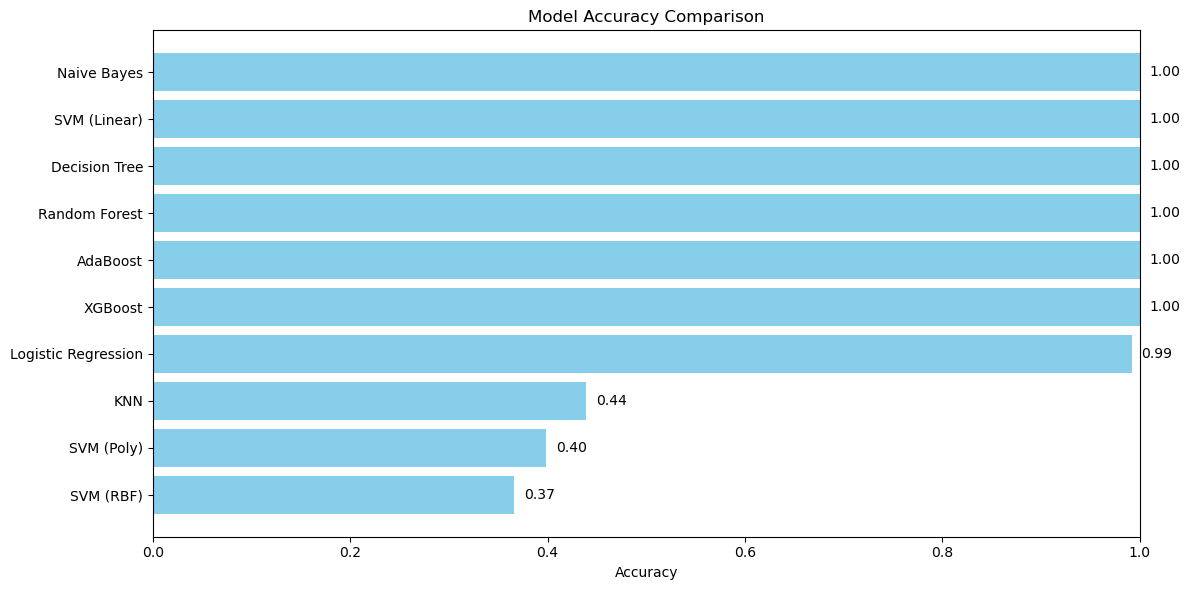

In [101]:
import matplotlib.pyplot as plt

# Sort by accuracy for better visualization
sorted_accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_accuracies.keys()), list(sorted_accuracies.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
for index, value in enumerate(sorted_accuracies.values()):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.tight_layout()
plt.show()